In [39]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2]:
#Read in the csv file and convert to a Pandas dataframe
marathon_df = pd.read_csv("Data/Riyadh Marathon Results.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [150]:
marathon_df.head()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761
2,55,3,Female,10KM RUN,SA,0 days 00:44:00.251000,0 days 00:43:56.317000,13.6,4.38,10 KM,2285,761
3,88,4,Female,10KM RUN,MA,0 days 00:48:28.115000,0 days 00:48:22.908000,12.4,4.83,10 KM,2285,761
4,93,5,Female,10KM RUN,SA,0 days 00:58:37.753000,0 days 00:48:27.714000,12.3,4.83,10 KM,2285,761


In [4]:
marathon_df.shape

(6397, 12)

**Note:**
- Your gun/clock time is the time on the official race clock from the moment the race started (when the gun went off) to when you crossed over the finish line.
- Your net/chip time is the time from when you personally cross the starting line to when you cross the finish.

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [12]:
marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6397 entries, 0 to 6396
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6397 non-null   int64 
 1   Rank         6397 non-null   object
 2   Gender Rank  6397 non-null   object
 3   Name         6397 non-null   object
 4   Gender       6397 non-null   object
 5   Category     6397 non-null   object
 6   Nationality  6085 non-null   object
 7   Gun Time     6397 non-null   object
 8   Chip Time    6227 non-null   object
 9   Speed        6227 non-null   object
 10  Pace         6227 non-null   object
 11  Distance     6397 non-null   object
dtypes: int64(1), object(11)
memory usage: 599.8+ KB


In [9]:
marathon_df.shape

(6397, 12)

In [14]:
marathon_df.describe(include='object')

,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
count,6397,6397,6397,6397,6397,6085,6397,6227,6227,6227,6397
unique,6031,6028,12,2,6,85,6216,6223,182,817,12
top,-,-,6e60b635-494b-4bbd-9a92-bb52ae2bf140,Male,10KM RUN,[img:flags/SA.gif],[22526.31|hh:mm:ss],01:20:48.160,6.1 Km/Hr,6:52 min/km,10 KM
freq,367,367,1579,4213,2374,3442,102,2,120,29,2360


In [10]:
marathon_df.columns 

Index(['Unnamed: 0', 'Rank', 'Gender Rank', 'Name', 'Gender', 'Category',
       'Nationality', 'Gun Time', 'Chip Time', 'Speed', 'Pace', 'Distance'],
      dtype='object')

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

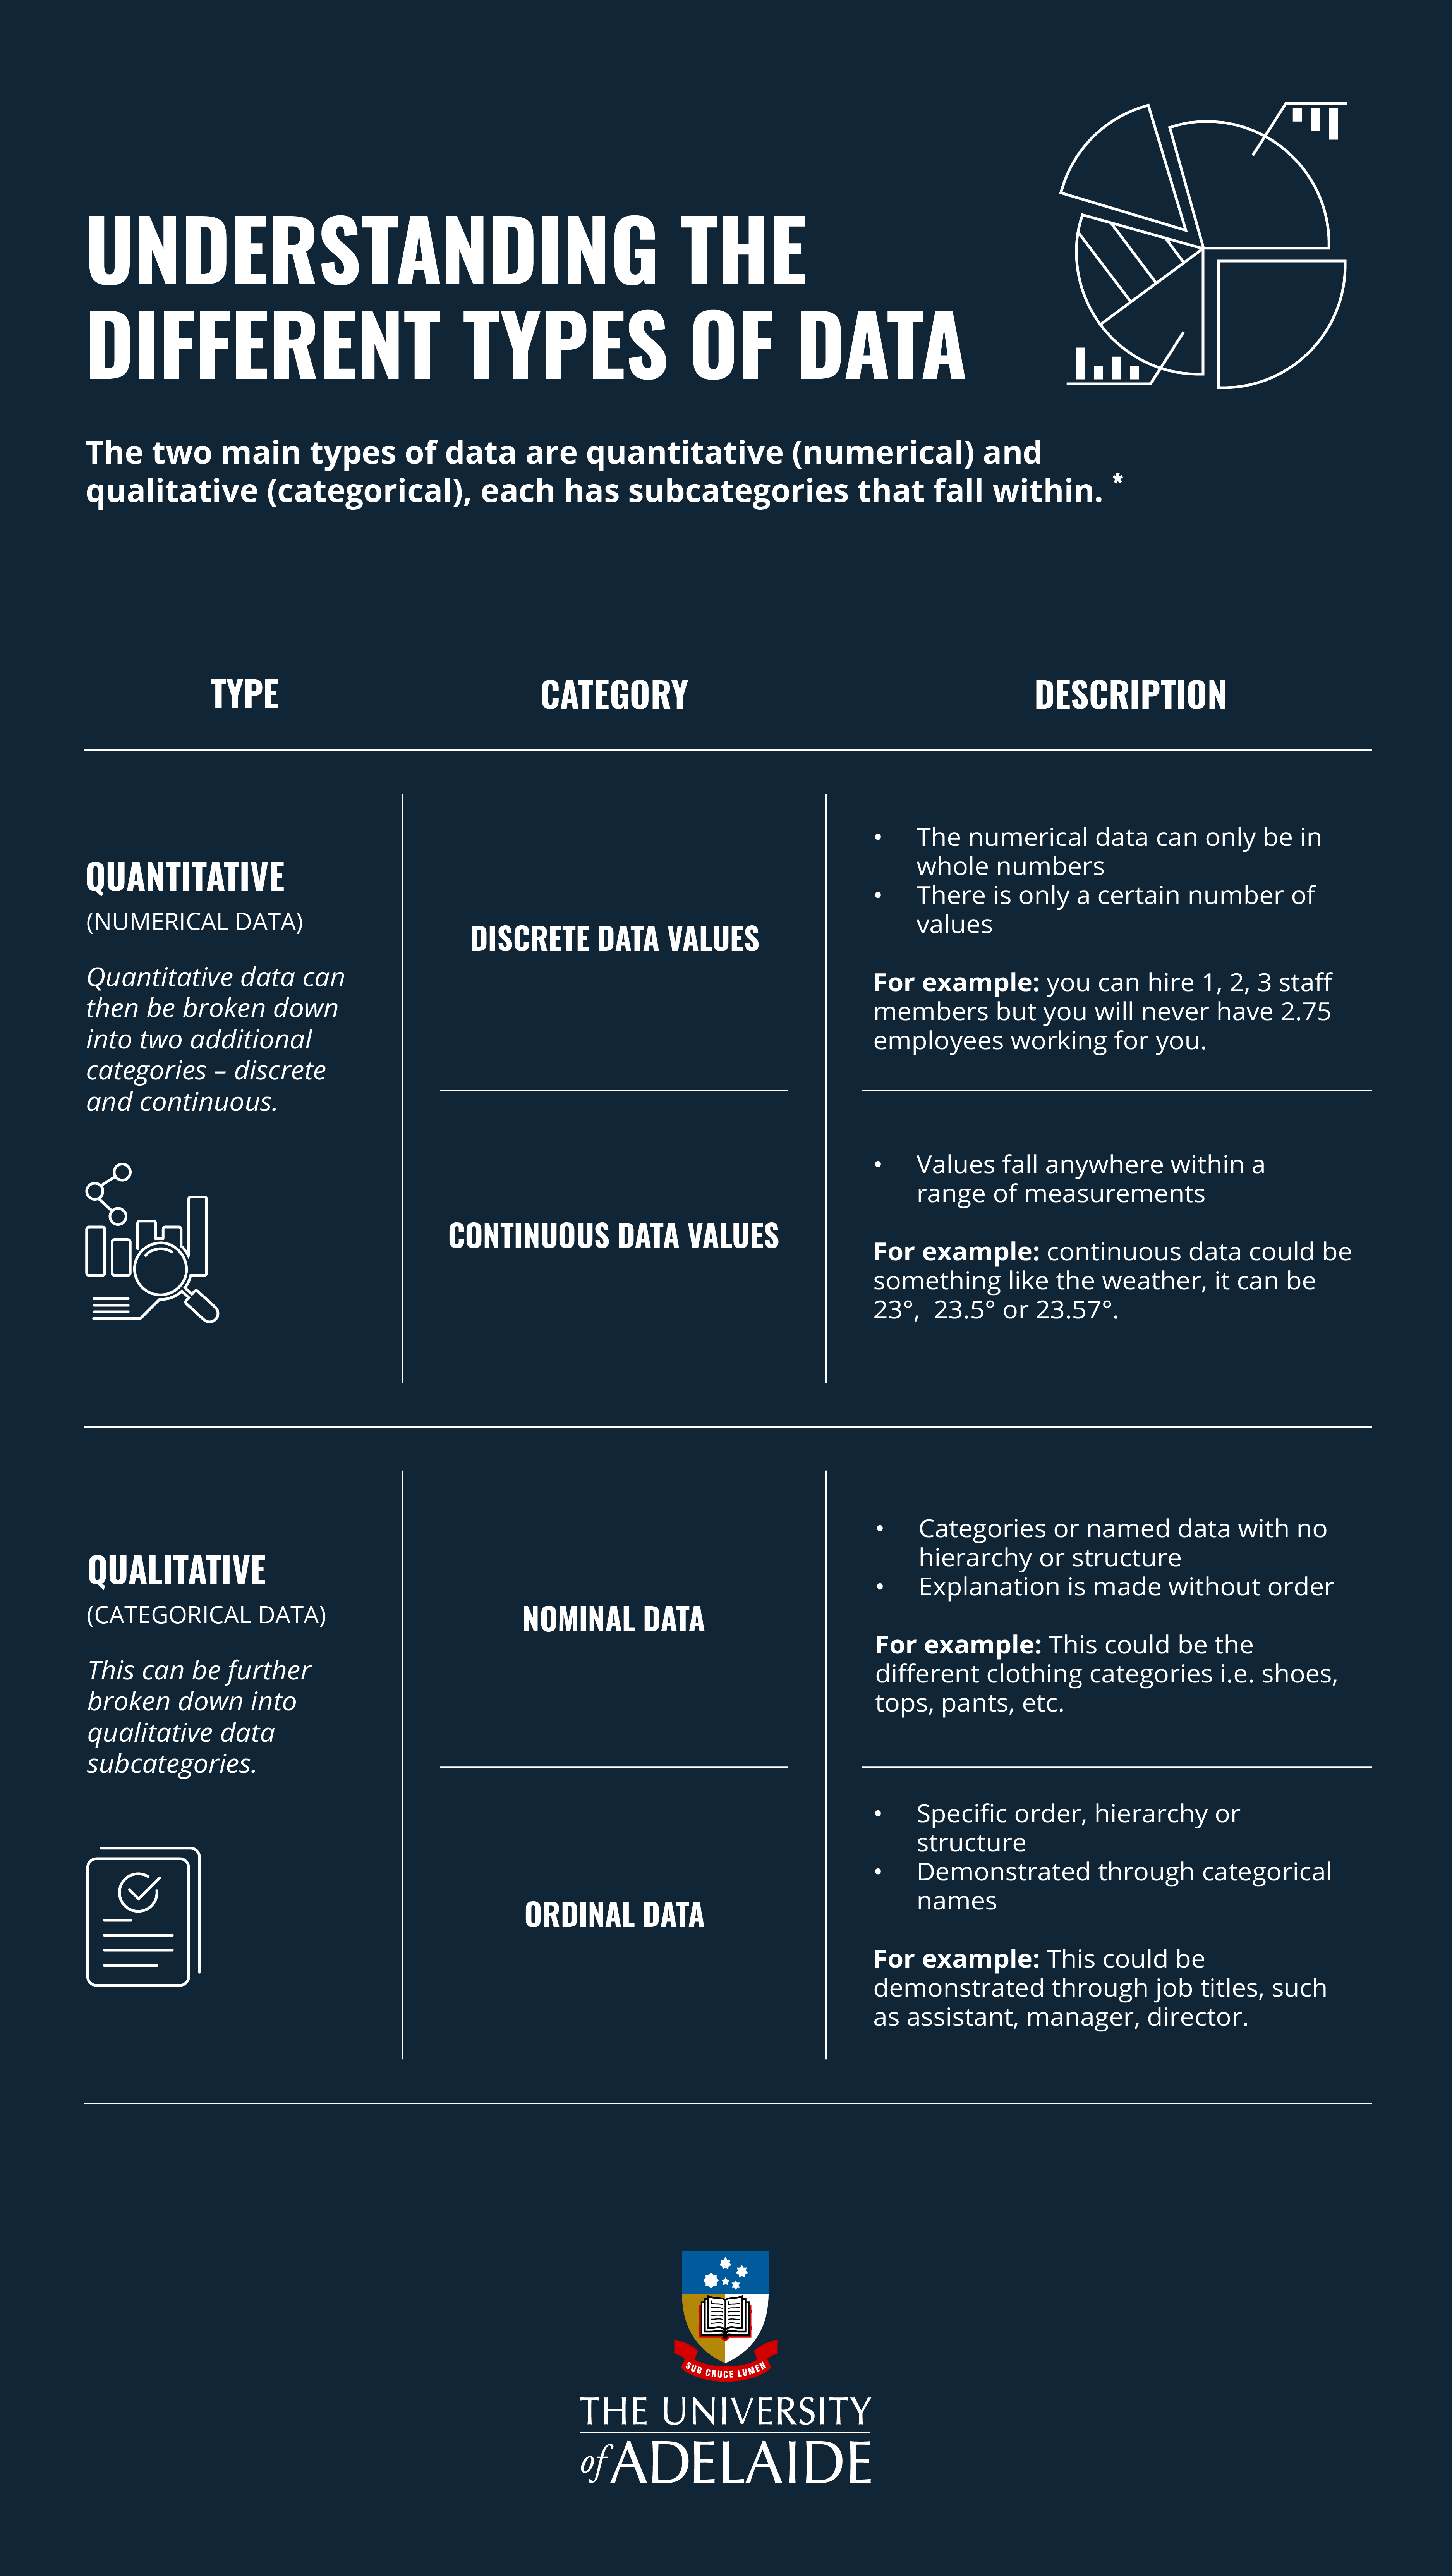

In [15]:
marathon_df.head()

,Unnamed: 0,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,2,55 / 2285,3 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,3,88 / 2285,4 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,4,93 / 2285,5 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [ ]:
# in the kaggle page mentioned data source

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [ ]:
# check one of the files and the big file 

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [17]:
marathon_df.head(2)

,Unnamed: 0,Rank,Gender Rank,Name,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,0,46 / 2285,1 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,1,53 / 2285,2 / 761,6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM


In [23]:
marathon_df.groupby(['Name', 'Gender', 'Category'])[['Name', 'Gender', 'Category']].count()

,,,Name,Gender,Category
Name,Gender,Category,,,
110903c1-ce66-4b6c-b35f-bfc2ed3fdb23,Male,MARATHON,478,478,478
1bc14a33-5d72-4b18-a492-1d94d0eba76d,Female,HALF MARATHON,233,233,233
3ce2e755-b5ea-409a-9174-31778c11fcf0,Male,HALF MARATHON,938,938,938
6b848725-e44d-42d8-a278-ae67faa9cb80,Female,10KM RUN,795,795,795
6e60b635-494b-4bbd-9a92-bb52ae2bf140,Male,10KM RUN,1579,1579,1579
7968347b-c3ac-417c-bccd-99854e8bf972,Female,MARATHON,75,75,75
7aa1ce03-6d9c-4b53-93a9-d01b1bae7334,Male,HALF MARATHON ELITE,3,3,3
a4d8a45d-d0f0-4d00-8bc9-3d9d6e31f73d,Female,MARATHON ELITE,9,9,9
cde359f8-5d73-4426-8ba6-cf021cfddbfc,Female,HALF MARATHON ELITE,3,3,3


In [18]:
marathon_df['Category'].value_counts()

Category
10KM RUN               2374
4KM FUN RUN            2271
HALF MARATHON          1171
MARATHON                553
MARATHON ELITE           22
HALF MARATHON ELITE       6
Name: count, dtype: int64

In [19]:
marathon_df["Name"].unique()

array(['6b848725-e44d-42d8-a278-ae67faa9cb80',
       '6e60b635-494b-4bbd-9a92-bb52ae2bf140',
       'ee2e687b-c339-4f3f-a481-2bee50f01521',
       'e084862c-4867-4cec-85d1-cc9d2e8acb60',
       '1bc14a33-5d72-4b18-a492-1d94d0eba76d',
       '3ce2e755-b5ea-409a-9174-31778c11fcf0',
       '7968347b-c3ac-417c-bccd-99854e8bf972',
       '110903c1-ce66-4b6c-b35f-bfc2ed3fdb23',
       'a4d8a45d-d0f0-4d00-8bc9-3d9d6e31f73d',
       'ee5b6325-c4f3-4122-8247-1818e59912c2',
       'cde359f8-5d73-4426-8ba6-cf021cfddbfc',
       '7aa1ce03-6d9c-4b53-93a9-d01b1bae7334'], dtype=object)

In [24]:
#Delete unrelevent columns
marathon_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [25]:
marathon_df.drop(["Name"],axis=1,inplace=True)

In [26]:
marathon_df.head()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,55 / 2285,3 / 761,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,88 / 2285,4 / 761,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,93 / 2285,5 / 761,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM


In [27]:
marathon_df.shape

(6397, 10)

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [28]:
marathon_df.head()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM
2,55 / 2285,3 / 761,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM
3,88 / 2285,4 / 761,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM
4,93 / 2285,5 / 761,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM


In [30]:
marathon_df.duplicated().sum() # -> 32020 duplicated rows

94

In [ ]:
#marathon_df.isnull().sum()

In [ ]:
#marathon_df[(marathon_df['Category']=='10KM RUN') & (marathon_df['Gender']=='Female') & (marathon_df['Gender Rank']!='-')].shape

In [ ]:
marathon_df.head()

In [32]:
#marathon_df[marathon_df.duplicated()][["Rank", "Gender Rank"]].value_counts()
marathon_df[marathon_df.duplicated()].describe()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
count,94,94,94,94,88,94,0,0,0,94
unique,1,1,2,4,6,3,0,0,0,8
top,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,35 KM
freq,94,94,63,50,75,57,NaN,NaN,NaN,41


In [33]:
marathon_df.drop_duplicates(inplace = True)

In [34]:
marathon_df.shape

(6303, 10)

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [38]:
#Display number missing values per column
marathon_df.isnull().sum().sort_values(ascending = False)

Nationality    306
Chip Time       76
Speed           76
Pace            76
Rank             0
Gender Rank      0
Gender           0
Category         0
Gun Time         0
Distance         0
dtype: int64

In [ ]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [55]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM


In [57]:
# check columns types 
marathon_df.dtypes

Rank           object
Gender Rank    object
Gender         object
Category       object
Nationality    object
Gun Time       object
Chip Time      object
Speed          object
Pace           object
Distance       object
dtype: object

In [ ]:
# go to clean them 

In [149]:
# check outliers 
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761


**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)


[![](https://markdown-videos-api.jorgenkh.no/youtube/aUKfwkHfgiA)](https://www.youtube.com/watch?v=aUKfwkHfgiA)

**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [ ]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [ ]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [ ]:
marathon_df.head(2)

In [ ]:
 marathon_df['Speed_Km/Hr']

In [223]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
speed_Q1 = marathon_df['Speed_Km/Hr'].quantile(0.25)
speed_Q3 = marathon_df['Speed_Km/Hr'].quantile(0.75)

# Calculate the IQR by subtracting Q1 from Q3
speed_IQR = speed_Q3 - speed_Q1

# Define the lower and upper bounds for the outliers
speed_lower_bound = speed_Q1 - 1.5 * speed_IQR
speed_upper_bound = speed_Q3 + 1.5 * speed_IQR

# # Filter out outliers
marathon_df[(marathon_df['Speed_Km/Hr'] < speed_lower_bound) | (marathon_df['Speed_Km/Hr'] > speed_upper_bound)]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min
795,1,1,Male,10KM RUN,SA,0 days 00:31:34.524000,0 days 00:31:33.764000,19.0,3.15,10 KM,2285,1524,31.56,31.58
796,2,2,Male,10KM RUN,SA,0 days 00:31:36.444000,0 days 00:31:35.168000,18.9,3.15,10 KM,2285,1524,31.59,31.61
797,3,3,Male,10KM RUN,SO,0 days 00:32:52.983000,0 days 00:32:52.381000,18.2,3.28,10 KM,2285,1524,32.87,32.88
798,4,4,Male,10KM RUN,SO,0 days 00:33:17.258000,0 days 00:33:15.920000,18.0,3.32,10 KM,2285,1524,33.27,33.29
799,5,5,Male,10KM RUN,SA,0 days 00:33:38.484000,0 days 00:33:36.183000,17.8,3.35,10 KM,2285,1524,33.60,33.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,5,2,Female,HALF MARATHON ELITE,ET,0 days 01:12:12.475000,0 days 01:12:08.442000,17.5,3.42,21.1 KM,6,3,72.14,72.21
6393,6,3,Female,HALF MARATHON ELITE,UA,0 days 01:18:23.645000,0 days 01:18:20.056000,16.1,3.70,21.1 KM,6,3,78.33,78.39
6394,1,1,Male,HALF MARATHON ELITE,KE,0 days 01:04:04.250000,0 days 01:04:00.497000,19.7,3.03,21.1 KM,6,3,64.01,64.07
6395,2,2,Male,HALF MARATHON ELITE,KE,0 days 01:04:06.571000,0 days 01:04:03.202000,19.7,3.03,21.1 KM,6,3,64.05,64.11


In [ ]:
# Calculate (5th percentile) and (95th percentile)
speed_5 = marathon_df['Speed_Km/Hr'].quantile(0.05)
speed_95 = marathon_df['Speed_Km/Hr'].quantile(0.95)
print(speed_5, speed_95)

# Filter out outliers
marathon_df[(marathon_df['Speed_Km/Hr'] < speed_5) | (marathon_df['Speed_Km/Hr'] > speed_95)].shape

In [ ]:
marathon_df.shape

In [ ]:
marathon_df['Speed_Km/Hr']

In [224]:
zscore(marathon_df['Speed_Km/Hr'])

0       2.224072
1       2.187555
2       2.114520
3       1.676310
4       1.639792
          ...   
6392    3.538702
6393    3.027457
6394    4.342087
6395    4.342087
6396    4.342087
Name: Speed_Km/Hr, Length: 6227, dtype: float64

In [225]:
# Calculate the z-score for each data point in the 'data' column
marathon_df['speed_z_score'] = zscore(marathon_df['Speed_Km/Hr'])

# Filter the DataFrame to remove outliers
marathon_df[(marathon_df['speed_z_score'] > 3) | (marathon_df['speed_z_score'] < -3)]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min,speed_z_score
795,1,1,Male,10KM RUN,SA,0 days 00:31:34.524000,0 days 00:31:33.764000,19.0,3.15,10 KM,2285,1524,31.56,31.58,4.086465
796,2,2,Male,10KM RUN,SA,0 days 00:31:36.444000,0 days 00:31:35.168000,18.9,3.15,10 KM,2285,1524,31.59,31.61,4.049947
797,3,3,Male,10KM RUN,SO,0 days 00:32:52.983000,0 days 00:32:52.381000,18.2,3.28,10 KM,2285,1524,32.87,32.88,3.794325
798,4,4,Male,10KM RUN,SO,0 days 00:33:17.258000,0 days 00:33:15.920000,18.0,3.32,10 KM,2285,1524,33.27,33.29,3.721290
799,5,5,Male,10KM RUN,SA,0 days 00:33:38.484000,0 days 00:33:36.183000,17.8,3.35,10 KM,2285,1524,33.60,33.64,3.648255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6392,5,2,Female,HALF MARATHON ELITE,ET,0 days 01:12:12.475000,0 days 01:12:08.442000,17.5,3.42,21.1 KM,6,3,72.14,72.21,3.538702
6393,6,3,Female,HALF MARATHON ELITE,UA,0 days 01:18:23.645000,0 days 01:18:20.056000,16.1,3.70,21.1 KM,6,3,78.33,78.39,3.027457
6394,1,1,Male,HALF MARATHON ELITE,KE,0 days 01:04:04.250000,0 days 01:04:00.497000,19.7,3.03,21.1 KM,6,3,64.01,64.07,4.342087
6395,2,2,Male,HALF MARATHON ELITE,KE,0 days 01:04:06.571000,0 days 01:04:03.202000,19.7,3.03,21.1 KM,6,3,64.05,64.11,4.342087


In [ ]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*ILbJXAzcB3hU4LxAMG6yLw.jpeg)

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

    2.5. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

    2.6. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [40]:
marathon_df.isnull().sum().sort_values(ascending = False)

Nationality    306
Chip Time       76
Speed           76
Pace            76
Rank             0
Gender Rank      0
Gender           0
Category         0
Gun Time         0
Distance         0
dtype: int64

In [47]:
# assume they did not attened since no time for chipping
marathon_df[marathon_df['Chip Time'].isnull()].describe()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
count,76,76,76,76,76,76,0,0,0,76
unique,1,1,2,5,26,3,0,0,0,9
top,-,-,Male,MARATHON,[img:flags/SA.gif],[22526.31|hh:mm:ss],NaN,NaN,NaN,0 KM
freq,76,76,53,29,21,45,NaN,NaN,NaN,30


In [45]:
marathon_df[marathon_df['Chip Time'].isnull()].isnull().sum()

Rank            0
Gender Rank     0
Gender          0
Category        0
Nationality     0
Gun Time        0
Chip Time      76
Speed          76
Pace           76
Distance        0
dtype: int64

In [48]:
marathon_df.dropna(subset=['Chip Time', 'Speed', 'Pace'], inplace=True)

In [49]:
marathon_df.isnull().sum().sort_values(ascending = False)

Rank           0
Gender Rank    0
Gender         0
Category       0
Nationality    0
Gun Time       0
Chip Time      0
Speed          0
Pace           0
Distance       0
dtype: int64

In [41]:
marathon_df[marathon_df['Nationality'].isnull()]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
6,130 / 2285,7 / 761,Female,10KM RUN,NaN,00:51:21.156,00:51:09.616,11.7 Km/Hr,5:06 min/km,10 KM
27,360 / 2285,28 / 761,Female,10KM RUN,NaN,00:59:46.301,00:59:44.562,10.0 Km/Hr,5:58 min/km,10 KM
39,455 / 2285,40 / 761,Female,10KM RUN,NaN,01:04:04.435,01:02:13.336,9.6 Km/Hr,6:13 min/km,10 KM
51,530 / 2285,52 / 761,Female,10KM RUN,NaN,01:05:52.357,01:04:16.292,9.3 Km/Hr,6:25 min/km,10 KM
54,536 / 2285,55 / 761,Female,10KM RUN,NaN,01:04:46.663,01:04:21.924,9.3 Km/Hr,6:26 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6316,-,-,Male,MARATHON,NaN,03:32:04.083,02:49:43.336,14.9 Km/Hr,4:01 min/km,42.2 KM
6317,-,-,Male,MARATHON,NaN,03:32:04.708,02:49:44.087,14.9 Km/Hr,4:01 min/km,42.2 KM
6330,-,-,Male,MARATHON,NaN,03:31:09.051,03:17:46.863,12.8 Km/Hr,4:41 min/km,42.2 KM
6351,-,-,Male,MARATHON,NaN,03:56:48.878,03:42:10.789,11.3 Km/Hr,5:15 min/km,42.2 KM


In [42]:
#other column data is good, so we assume that this missing during collecting data (filling form)
marathon_df['Nationality'].fillna('Unknown!', inplace=True)

/var/folders/9n/yvd02hfx57z6hx0832zwsdrr0000gn/T/ipykernel_14918/163565897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marathon_df['Nationality'].fillna('Unknown!', inplace=True)


In [43]:
marathon_df.isnull().sum().sort_values(ascending = False)

Chip Time      76
Speed          76
Pace           76
Rank            0
Gender Rank     0
Gender          0
Category        0
Nationality     0
Gun Time        0
Distance        0
dtype: int64

In [50]:
marathon_df[(marathon_df['Rank']=='-')]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
770,-,-,Female,10KM RUN,[img:flags/SA.gif],00:42:05.165,00:42:05.165,14.2 Km/Hr,4:12 min/km,10 KM
771,-,-,Female,10KM RUN,[img:flags/IN.gif],01:04:07.034,01:04:07.034,9.3 Km/Hr,6:24 min/km,10 KM
772,-,-,Female,10KM RUN,[img:flags/PT.gif],01:18:07.863,01:18:07.863,7.6 Km/Hr,7:48 min/km,10 KM
773,-,-,Female,10KM RUN,[img:flags/PH.gif],01:18:46.940,01:18:46.940,7.6 Km/Hr,7:52 min/km,10 KM
774,-,-,Female,10KM RUN,[img:flags/PH.gif],01:22:28.217,01:22:28.217,7.2 Km/Hr,8:14 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6364,-,-,Male,MARATHON,[img:flags/SA.gif],04:29:23.849,04:17:28.782,9.8 Km/Hr,6:06 min/km,42.2 KM
6365,-,-,Male,MARATHON,[img:flags/AF.gif],04:42:13.532,04:30:08.835,9.3 Km/Hr,6:24 min/km,42.2 KM
6366,-,-,Male,MARATHON,[img:flags/SA.gif],04:53:02.507,04:41:14.383,9.0 Km/Hr,6:39 min/km,42.2 KM
6367,-,-,Male,MARATHON,Unknown!,04:53:55.101,04:53:55.101,8.6 Km/Hr,6:57 min/km,42.2 KM


In [51]:
marathon_df['Rank'] = marathon_df['Rank'].map(lambda x : '0 / 0' if x == '-' else x )

In [52]:
marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x : '0 / 0' if x == '-' else x )

In [53]:
marathon_df[(marathon_df['Rank']=='0 / 0')]

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
770,0 / 0,0 / 0,Female,10KM RUN,[img:flags/SA.gif],00:42:05.165,00:42:05.165,14.2 Km/Hr,4:12 min/km,10 KM
771,0 / 0,0 / 0,Female,10KM RUN,[img:flags/IN.gif],01:04:07.034,01:04:07.034,9.3 Km/Hr,6:24 min/km,10 KM
772,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PT.gif],01:18:07.863,01:18:07.863,7.6 Km/Hr,7:48 min/km,10 KM
773,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PH.gif],01:18:46.940,01:18:46.940,7.6 Km/Hr,7:52 min/km,10 KM
774,0 / 0,0 / 0,Female,10KM RUN,[img:flags/PH.gif],01:22:28.217,01:22:28.217,7.2 Km/Hr,8:14 min/km,10 KM
...,...,...,...,...,...,...,...,...,...,...
6364,0 / 0,0 / 0,Male,MARATHON,[img:flags/SA.gif],04:29:23.849,04:17:28.782,9.8 Km/Hr,6:06 min/km,42.2 KM
6365,0 / 0,0 / 0,Male,MARATHON,[img:flags/AF.gif],04:42:13.532,04:30:08.835,9.3 Km/Hr,6:24 min/km,42.2 KM
6366,0 / 0,0 / 0,Male,MARATHON,[img:flags/SA.gif],04:53:02.507,04:41:14.383,9.0 Km/Hr,6:39 min/km,42.2 KM
6367,0 / 0,0 / 0,Male,MARATHON,Unknown!,04:53:55.101,04:53:55.101,8.6 Km/Hr,6:57 min/km,42.2 KM


In [ ]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [58]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance
0,46 / 2285,1 / 761,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM
1,53 / 2285,2 / 761,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM


In [59]:
marathon_df.dtypes

Rank           object
Gender Rank    object
Gender         object
Category       object
Nationality    object
Gun Time       object
Chip Time      object
Speed          object
Pace           object
Distance       object
dtype: object

In [78]:
def clean_rank(x):
    return int(x.split(' / ')[0])
clean_rank_total = lambda x: int(x.split(' / ')[1])

In [81]:
marathon_df['Rank_total'] = marathon_df['Rank'].apply(clean_rank_total)
marathon_df['Rank'] = marathon_df['Rank'].apply(clean_rank)

AttributeError: 'int' object has no attribute 'split'

In [82]:
marathon_df['Gender Rank_total'] = marathon_df['Gender Rank'].apply(clean_rank_total)
marathon_df['Gender Rank'] = marathon_df['Gender Rank'].apply(clean_rank)

In [83]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM,2285,761


In [ ]:
y = lambda x: int(x.split('/')[0])
y('3 / 2334')

In [ ]:
marathon_df['Rank'] = marathon_df['Rank'].map(lambda x: int(x.split('/')[0]))
marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x: int(x.split('/')[0]))

In [85]:
marathon_df.head()

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,[img:flags/SA.gif],00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,[img:flags/CZ.gif],00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM,2285,761
2,55,3,Female,10KM RUN,[img:flags/SA.gif],00:44:00.251,00:43:56.317,13.6 Km/Hr,4:23 min/km,10 KM,2285,761
3,88,4,Female,10KM RUN,[img:flags/MA.gif],00:48:28.115,00:48:22.908,12.4 Km/Hr,4:50 min/km,10 KM,2285,761
4,93,5,Female,10KM RUN,[img:flags/SA.gif],00:58:37.753,00:48:27.714,12.3 Km/Hr,4:50 min/km,10 KM,2285,761


In [89]:
marathon_df['Category'].value_counts()

Category
10KM RUN               2352
4KM FUN RUN            2225
HALF MARATHON          1152
MARATHON                474
MARATHON ELITE           18
HALF MARATHON ELITE       6
Name: count, dtype: int64

In [ ]:
#marathon_df['Gender_Rank_Total'] = marathon_df['Gender Rank'].map(lambda x: int(x.split('/')[1]))
#marathon_df['Gender Rank'] = marathon_df['Gender Rank'].map(lambda x: int(x.split('/')[0]))

In [84]:
marathon_df.dtypes

Rank                  int64
Gender Rank           int64
Gender               object
Category             object
Nationality          object
Gun Time             object
Chip Time            object
Speed                object
Pace                 object
Distance             object
Rank_total            int64
Gender Rank_total     int64
dtype: object

In [103]:
marathon_df['Nationality'][0].split('/')[1].split('.')[0]

'SA'

In [104]:
 marathon_df['Nationality'].map(lambda x: x.split('/')[1].split('.')[0])

IndexError: list index out of range

In [ ]:
 y = lambda x: x.split('/')[1].split('.')[0]
y("[img:flags/SA.gif]")

In [105]:
marathon_df['Nationality'] = marathon_df['Nationality'].map(lambda x: x if x=="Unknown!" else x.split('/')[1].split('.')[0])

In [ ]:
#marathon_df['Nationality'] = marathon_df['Nationality'].map(lambda x : x if x=='Unknown!' else x.split('/')[1].split('.')[0])

In [ ]:
# you could use regular experssion 
# https://regex-generator.olafneumann.org/

In [106]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,00:42:59.556,00:42:57.505,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,00:43:28.175,00:43:24.774,13.8 Km/Hr,4:20 min/km,10 KM,2285,761


In [107]:
marathon_df.dtypes

Rank                  int64
Gender Rank           int64
Gender               object
Category             object
Nationality          object
Gun Time             object
Chip Time            object
Speed                object
Pace                 object
Distance             object
Rank_total            int64
Gender Rank_total     int64
dtype: object

In [ ]:
#marathon_df['Chip Time'] = pd.to_datetime(marathon_df['Chip Time'], format='%H:%M:%S.%f')
#marathon_df['Chip Time'] = marathon_df['Chip Time'].dt.floor('s')

#marathon_df['Gun Time'] = pd.to_datetime(marathon_df['Gun Time'], format='%H:%M:%S.%f')
#marathon_df['Gun Time'] = marathon_df['Gun Time'].dt.floor('s')


In [109]:
pd.to_timedelta(marathon_df['Chip Time'])

0      0 days 00:42:57.505000
1      0 days 00:43:24.774000
2      0 days 00:43:56.317000
3      0 days 00:48:22.908000
4      0 days 00:48:27.714000
                ...          
6392   0 days 01:12:08.442000
6393   0 days 01:18:20.056000
6394   0 days 01:04:00.497000
6395   0 days 01:04:03.202000
6396   0 days 01:04:06.290000
Name: Chip Time, Length: 6227, dtype: timedelta64[ns]

In [110]:
marathon_df['Chip Time'] = pd.to_timedelta(marathon_df['Chip Time'])
marathon_df['Gun Time'] = pd.to_timedelta(marathon_df['Gun Time'])

In [111]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed,Pace,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9 Km/Hr,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8 Km/Hr,4:20 min/km,10 KM,2285,761


In [112]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed                         object
Pace                          object
Distance                      object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [124]:
marathon_df['Speed'].apply(lambda x: x[-5:]).unique()

array(['Km/Hr'], dtype=object)

In [129]:
marathon_df['Speed'].apply(lambda x: x.split()[1]).unique()

array(['Km/Hr'], dtype=object)

In [132]:
marathon_df['Speed'].apply(lambda x: float(x.split()[0]))

0       13.9
1       13.8
2       13.6
3       12.4
4       12.3
        ... 
6392    17.5
6393    16.1
6394    19.7
6395    19.7
6396    19.7
Name: Speed, Length: 6227, dtype: float64

In [ ]:
y = lambda x : float(x.split()[0])
y('13.9 Km/Hr')

In [133]:
marathon_df['Speed'] = marathon_df['Speed'].map(lambda x : float(x.split()[0]))

In [134]:
# to not forget information about speed
marathon_df.rename(columns={'Speed': 'Speed_Km/Hr'}, inplace=True)

In [135]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4:17 min/km,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4:20 min/km,10 KM,2285,761


In [136]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed_Km/Hr                  float64
Pace                          object
Distance                      object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [137]:
marathon_df['Pace']

0       4:17 min/km
1       4:20 min/km
2       4:23 min/km
3       4:50 min/km
4       4:50 min/km
           ...     
6392    3:25 min/km
6393    3:42 min/km
6394    3:02 min/km
6395    3:02 min/km
6396    3:02 min/km
Name: Pace, Length: 6227, dtype: object

In [141]:
marathon_df['Pace'].map(lambda x : x.split()[0])#.value_counts()

0       4:17
1       4:20
2       4:23
3       4:50
4       4:50
        ... 
6392    3:25
6393    3:42
6394    3:02
6395    3:02
6396    3:02
Name: Pace, Length: 6227, dtype: object

In [ ]:
# marathon_df['Pace'] = pd.to_timedelta(marathon_df['Pace'].map(lambda x : '00:'+x.split()[0]))

In [142]:
def convert_pace(str_pace):
    time = str_pace.split(':')
    new_time = int(time[0]) + int(time[1])/60
    return round(new_time, 2)

In [143]:
marathon_df['Pace'] =  marathon_df['Pace'].map(lambda x: x.split(' ')[0])

In [144]:
marathon_df['Pace'] = marathon_df['Pace'].map(convert_pace)
# to not forget information about speed
marathon_df.rename(columns={'Pace': 'Pace_min_Km'}, inplace=True)

In [145]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761


In [148]:
marathon_df[['Distance', 'Category']].value_counts()

Distance  Category           
10 KM     10KM RUN               2352
4 KM      4KM FUN RUN            2225
21.1 KM   HALF MARATHON          1152
42.2 KM   MARATHON                474
          MARATHON ELITE           18
21.1 KM   HALF MARATHON ELITE       6
Name: count, dtype: int64

In [146]:
marathon_df.dtypes

Rank                           int64
Gender Rank                    int64
Gender                        object
Category                      object
Nationality                   object
Gun Time             timedelta64[ns]
Chip Time            timedelta64[ns]
Speed_Km/Hr                  float64
Pace_min_Km                  float64
Distance                      object
Rank_total                     int64
Gender Rank_total              int64
dtype: object

In [ ]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [ ]:
marathon_df = marathon_df[(marathon_df['speed_z_score'] <= 3) & (marathon_df['speed_z_score'] >= -3)]

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [151]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761


In [ ]:
marathon_df.dtypes

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

In [152]:
marathon_df['Gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
6392    Female
6393    Female
6394      Male
6395      Male
6396      Male
Name: Gender, Length: 6227, dtype: object

In [153]:
counts_gender = marathon_df['Gender'].value_counts()
counts_gender

Gender
Male      4097
Female    2130
Name: count, dtype: int64

In [157]:
counts_gender.index

Index(['Male', 'Female'], dtype='object', name='Gender')

In [154]:
counts_gender.values

array([4097, 2130])

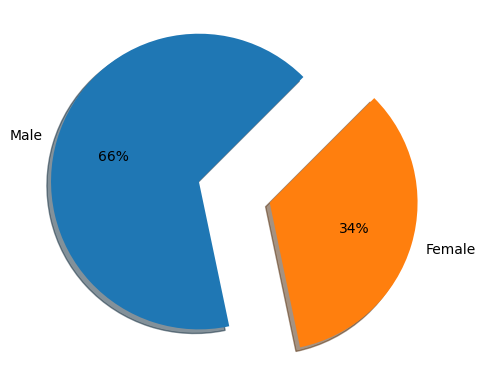

In [165]:
plt.pie(x=counts_gender.values,
        labels=counts_gender.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
         explode = [0.3,0.2]
       )
plt.show()

In [167]:
distance_counts = marathon_df["Distance"].value_counts()
distance_counts

Distance
10 KM      2352
4 KM       2225
21.1 KM    1158
42.2 KM     492
Name: count, dtype: int64

In [168]:
category_counts = marathon_df["Category"].value_counts()
category_counts

Category
10KM RUN               2352
4KM FUN RUN            2225
HALF MARATHON          1152
MARATHON                474
MARATHON ELITE           18
HALF MARATHON ELITE       6
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

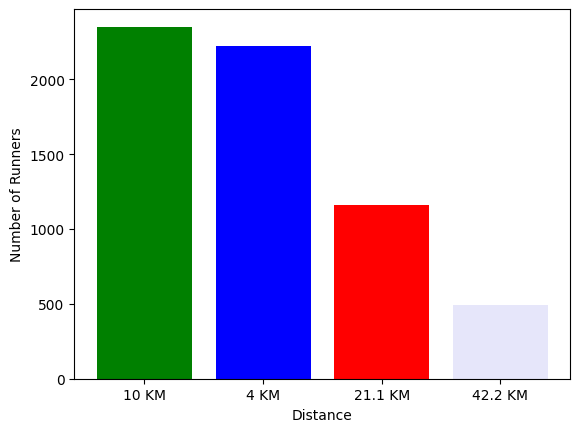

In [182]:
plt.bar(distance_counts.index,
        distance_counts.values,
        color=['green', 'blue', 'red', 'lavender']
       )
plt.ylabel("Number of Runners")
plt.xlabel("Distance")
# plt.grid()
plt.show

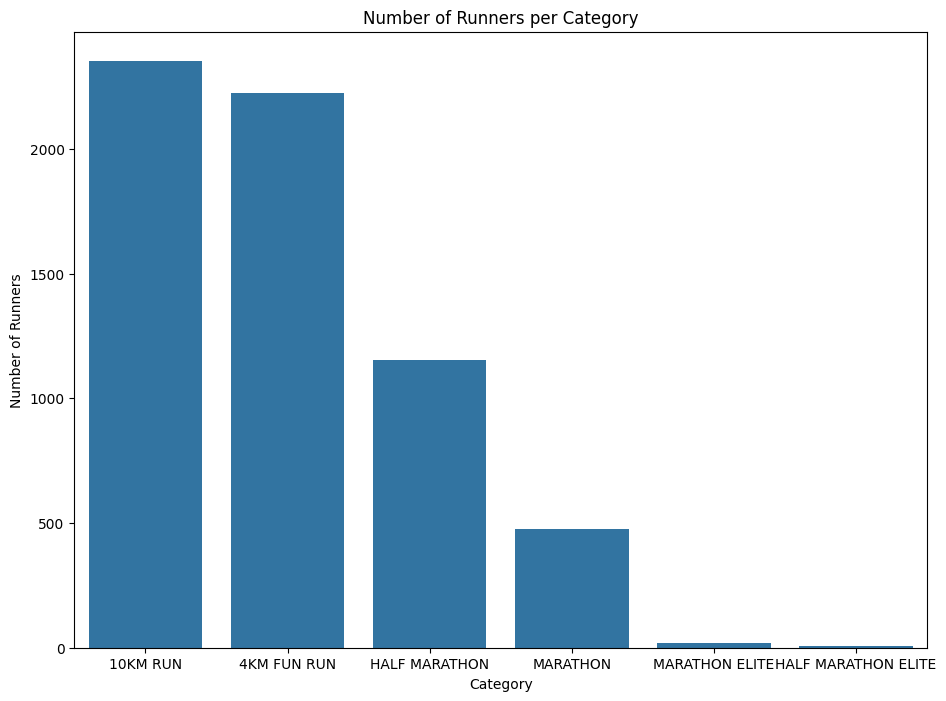

In [185]:
plt.figure(figsize=(11,8))
sns.countplot(data=marathon_df,
              x="Category")
plt.title("Number of Runners per Category")
plt.ylabel("Number of Runners")
plt.show()

In [176]:
distance_counts

Distance
10 KM      2352
4 KM       2225
21.1 KM    1158
42.2 KM     492
Name: count, dtype: int64

/var/folders/9n/yvd02hfx57z6hx0832zwsdrr0000gn/T/ipykernel_14918/3197326233.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Distance",


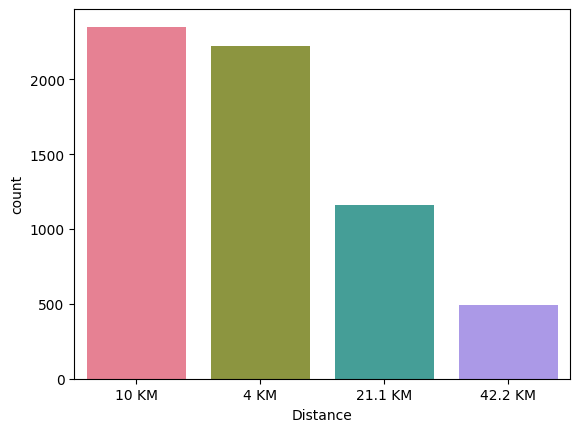

In [184]:
sns.barplot(x="Distance",
            y="count",
            data=distance_counts.to_frame(),
           palette="husl");

In [190]:
top_nat_counts = marathon_df["Nationality"].value_counts().head(10)
top_nat_counts

Nationality
SA          3346
PH           452
Unknown!     298
IN           239
GB           210
EG           206
PK           154
JO           122
LB           120
MY            80
Name: count, dtype: int64

In [187]:
type(top_nat_counts)

pandas.core.series.Series

In [ ]:
marathon_df.shape

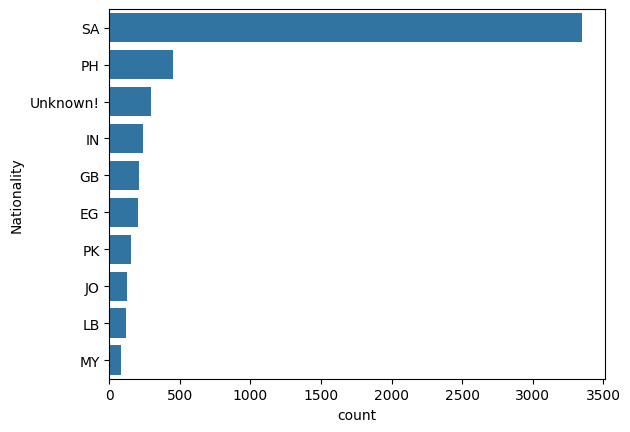

In [191]:
sns.barplot(y="Nationality", x="count",data=top_nat_counts.to_frame());

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In [221]:
temp = marathon_df[marathon_df['Speed_Km/Hr']<19]

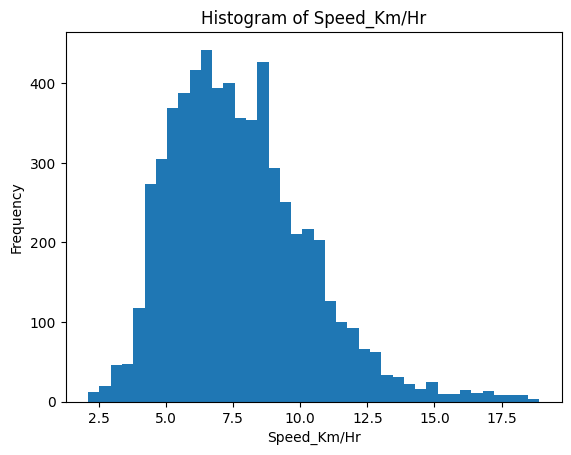

In [222]:
plt.hist(temp['Speed_Km/Hr'],
         #,facecolor = 'b', edgecolor = 'red',
         bins = 40
        ) # bins = 6 means 6 bars
plt.xlabel('Speed_Km/Hr')
plt.ylabel('Frequency')
plt.title(f'Histogram of Speed_Km/Hr')
plt.show()

In [194]:
## Note: The insights would be taking for each race individually 
marathon_4KM_df = marathon_df[marathon_df["Category"]=='4KM FUN RUN']
marathon_10KM_df = marathon_df[marathon_df["Category"]=='10KM RUN']
marathon_21KM_df = marathon_df[marathon_df["Category"]=='HALF MARATHON']
marathon_21KM_e_df = marathon_df[marathon_df["Category"]=='HALF MARATHON ELITE']
marathon_42KM_df = marathon_df[marathon_df["Category"]=='MARATHON']
marathon_42KM_e_df = marathon_df[marathon_df["Category"]=='MARATHON ELITE']

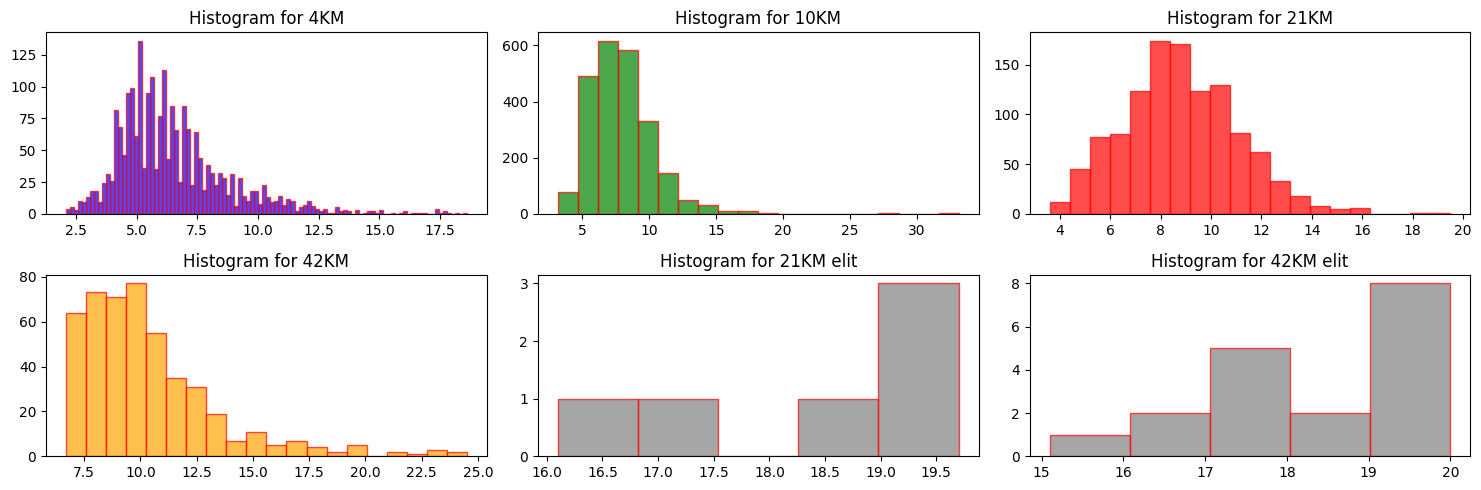

In [195]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0][0].hist(marathon_4KM_df['Speed_Km/Hr'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')

axes[0][1].hist(marathon_10KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

axes[0][2].hist(marathon_21KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

axes[1][0].hist(marathon_42KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

axes[1][1].hist(marathon_21KM_e_df['Speed_Km/Hr'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

axes[1][2].hist(marathon_42KM_e_df['Speed_Km/Hr'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
# Stacked Histogram separated by origin
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x="Speed_Km/Hr",
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [ ]:
marathon_df['Speed_Km/Hr'].quantile(0.75)

In [ ]:
plt.figure(figsize=(15,8))
plt.boxplot(marathon_df['Speed_Km/Hr'])
plt.xlabel('Speed_Km/Hr')

plt.title(f'Box plot of Speed_Km/Hr')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y="Speed_Km/Hr",
    hue="Category")

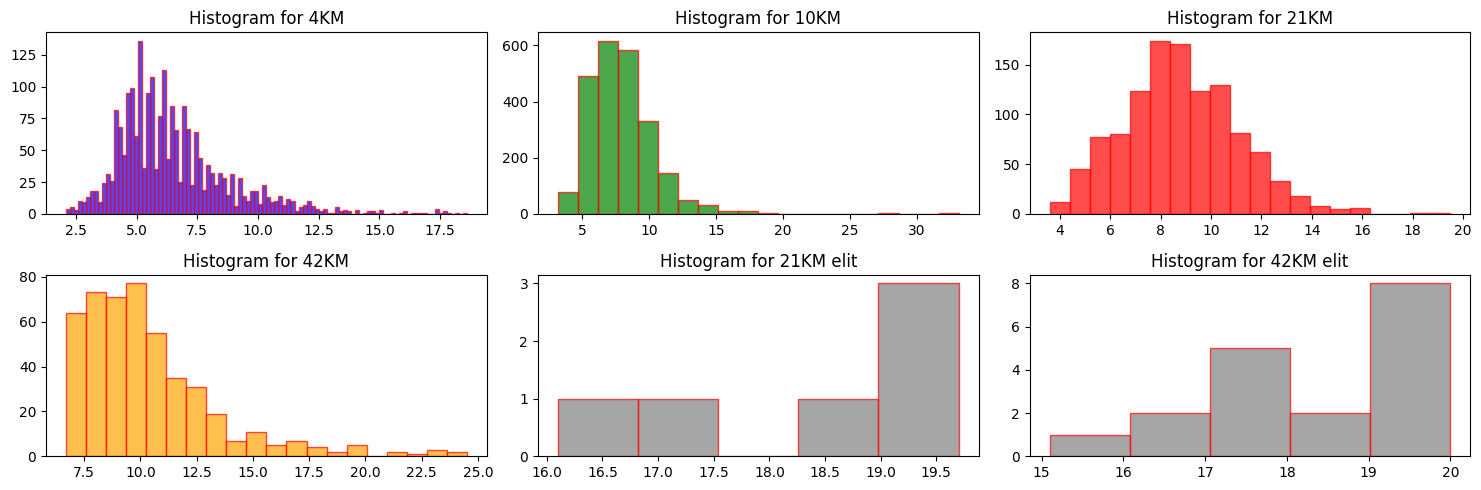

In [196]:
# Create a figure and an array of axes with a subplot for each histogram
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

# Plot a histogram for each dataset using plt.hist
axes[0][0].hist(marathon_4KM_df['Speed_Km/Hr'],edgecolor = 'red', bins=100, alpha=0.7, color='blue')
axes[0][0].set_title('Histogram for 4KM')

axes[0][1].hist(marathon_10KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='green')
axes[0][1].set_title('Histogram for 10KM')

axes[0][2].hist(marathon_21KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='red')
axes[0][2].set_title('Histogram for 21KM')

axes[1][0].hist(marathon_42KM_df['Speed_Km/Hr'], edgecolor = 'red', bins=20, alpha=0.7, color='orange')
axes[1][0].set_title('Histogram for 42KM')

axes[1][1].hist(marathon_21KM_e_df['Speed_Km/Hr'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][1].set_title('Histogram for 21KM elit')

axes[1][2].hist(marathon_42KM_e_df['Speed_Km/Hr'],edgecolor = 'red', bins=5, alpha=0.7, color='grey')
axes[1][2].set_title('Histogram for 42KM elit')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: xlabel='Pace_min_Km', ylabel='Count'>

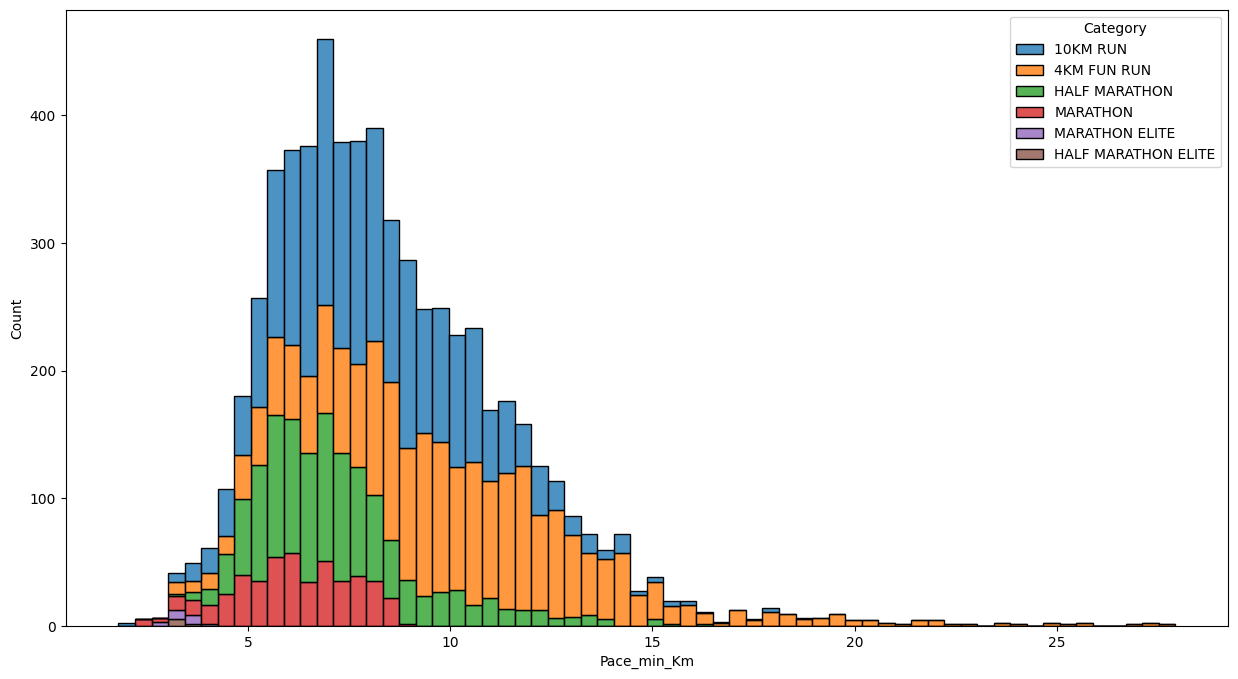

In [200]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x="Pace_min_Km",
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

<Axes: ylabel='Pace_min_Km'>

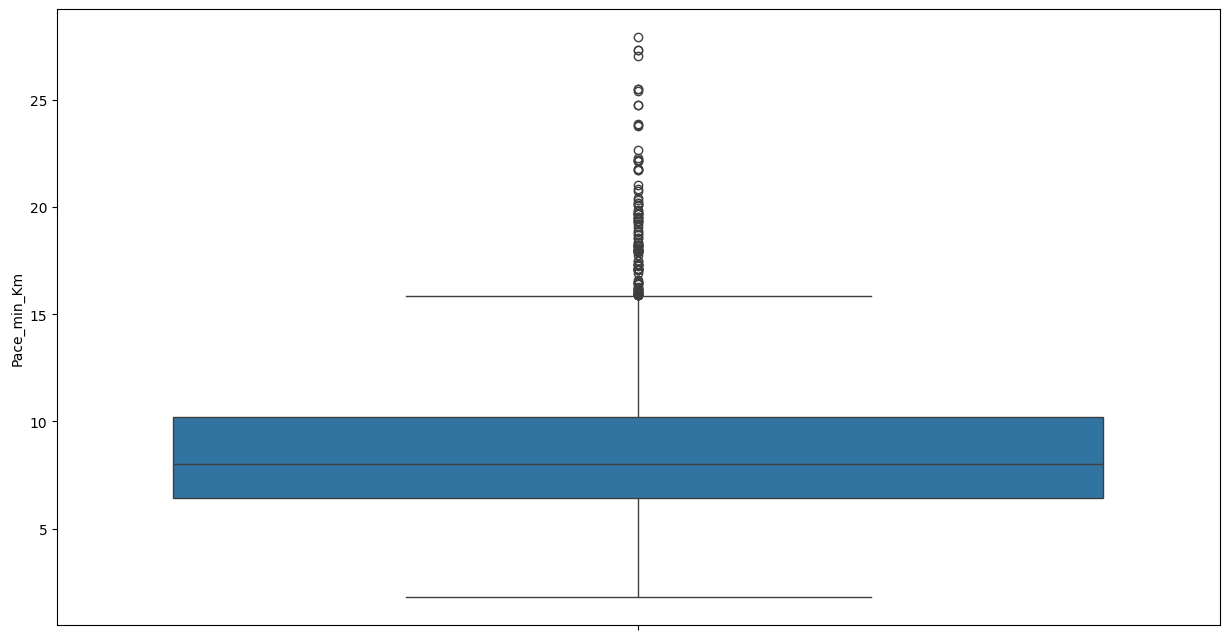

In [201]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y="Pace_min_Km",
    #hue="Category"
)

In [ ]:
marathon_df.head(2)

In [202]:
# called feature engineering
marathon_df['Chip Time duration-min'] = marathon_df['Chip Time'].dt.total_seconds()/60
marathon_df['Chip Time duration-min'] = marathon_df['Chip Time duration-min'].apply(lambda x: np.round(x, 2))
marathon_df['Gun Time duration-min'] = marathon_df['Gun Time'].dt.total_seconds()/60
marathon_df['Gun Time duration-min'] = marathon_df['Gun Time duration-min'].apply(lambda x: np.round(x, 2))

In [203]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,42.96,42.99
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,43.41,43.47


<Axes: xlabel='Chip Time duration-min', ylabel='Count'>

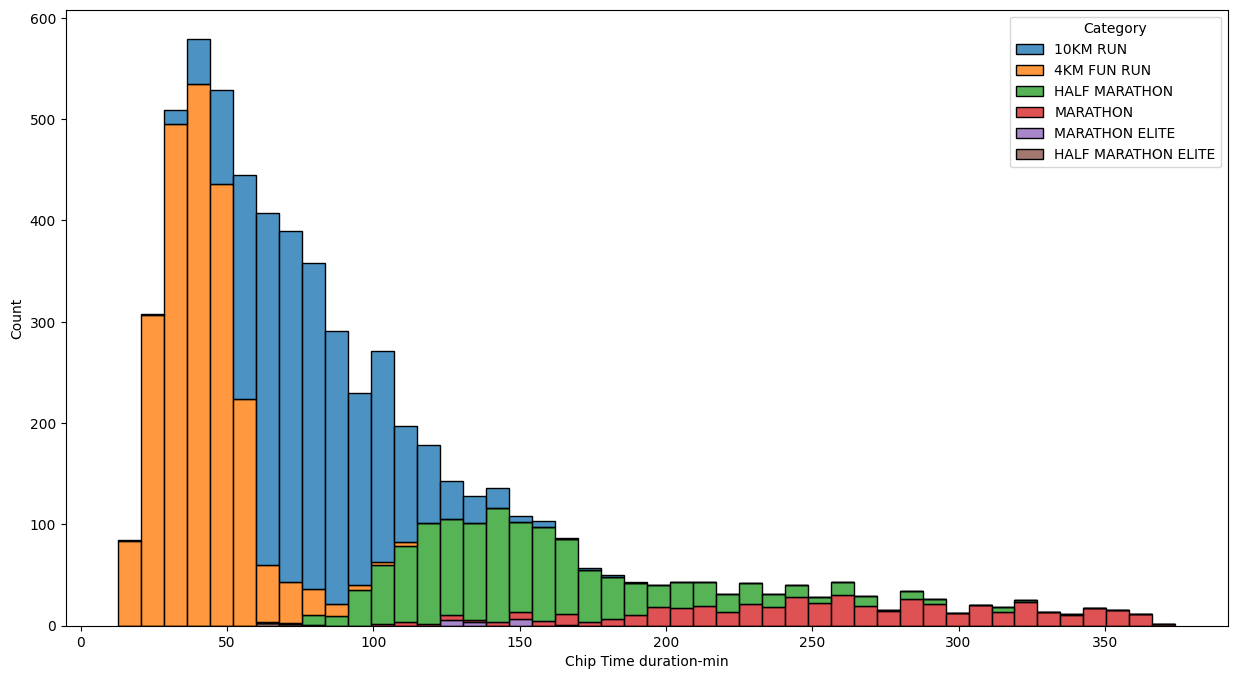

In [204]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x='Chip Time duration-min',
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(
    marathon_df,
    x='Gun Time duration-min',
    hue="Category", # color of plot elements
    multiple="stack", # also can be layer or dodge or fill
    alpha=0.8)

In [ ]:
marathon_df.head(2)

In [ ]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y='Chip Time duration-min',
    hue="Category")

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [206]:
marathon_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,6227.0,928.820299,664.99726,0.0,334.5,840.0,1474.5,2285.0
Gender Rank,6227.0,510.98651,378.504283,0.0,185.0,460.0,774.0,1524.0
Gun Time,6227,0 days 01:40:26.067858679,0 days 01:13:11.546034299,0 days 00:12:52.781000,0 days 00:48:06.457500,0 days 01:16:01.507000,0 days 02:09:54.523000,0 days 06:20:21.380000
Chip Time,6227,0 days 01:34:00.664645254,0 days 01:08:47.363020329,0 days 00:12:52.781000,0 days 00:45:33.614000,0 days 01:12:38.800000,0 days 01:57:57.833000,0 days 06:14:05.366000
Speed_Km/Hr,6227.0,7.809571,2.738633,2.1,5.8,7.4,9.3,33.1
Pace_min_Km,6227.0,8.538052,2.975501,1.8,6.43,8.0,10.2,27.93
Rank_total,6227.0,1856.672234,681.637586,0.0,1128.0,2220.0,2285.0,2285.0
Gender Rank_total,6227.0,1021.004657,411.210106,0.0,761.0,1038.0,1182.0,1524.0
Chip Time duration-min,6227.0,94.011071,68.78933,12.88,45.56,72.65,117.965,374.09
Gun Time duration-min,6227.0,100.434495,73.192392,12.88,48.11,76.03,129.91,380.36


In [207]:
# describe(include=’all’) provides a statistics summary of all data, include object, category etc
marathon_df.describe(include='object').T

,count,unique,top,freq
Gender,6227,2,Male,4097
Category,6227,6,10KM RUN,2352
Nationality,6227,86,SA,3346
Distance,6227,4,10 KM,2352


In [208]:
print(marathon_df['Pace_min_Km'].mean())
print(marathon_df['Pace_min_Km'].std())

8.53805203147583
2.975501460547262


In [210]:
print(np.mean(marathon_df['Pace_min_Km']))
print(np.std(marathon_df['Pace_min_Km']))

8.53805203147583
2.9752625316144043


In [214]:
np.quantile(marathon_df['Pace_min_Km'],0.80)

10.778

In [212]:
marathon_df['Pace_min_Km'].quantile(0.25)

6.43

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

In [ ]:
# above is example of negative correlation

In [215]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,42.96,42.99
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,43.41,43.47


<Axes: ylabel='Speed_Km/Hr'>

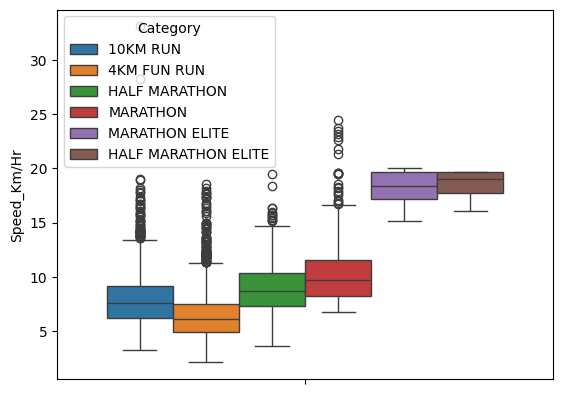

In [216]:
sns.boxplot(
    marathon_df,
    y="Speed_Km/Hr",
    hue="Category")

In [ ]:
sns.boxplot(
    marathon_df,
    y='Pace_min_Km',
    hue="Category")

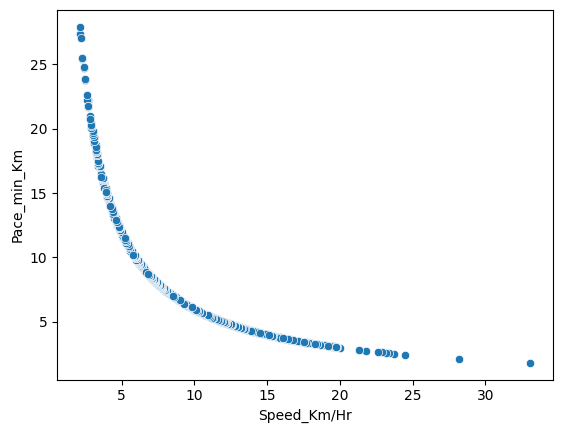

In [226]:
# Create a scatter plot
sns.scatterplot(y='Pace_min_Km', x='Speed_Km/Hr',
                #hue='Category',
                data=marathon_df)



# Show the plot
plt.show()

In [227]:
#Create a correlation matrix to show relationship between select variables
corr_matrix = marathon_df.corr()
corr_matrix

ValueError: could not convert string to float: 'Female'

In [228]:
corr_matrix = marathon_df.select_dtypes(include=np.number).corr()
corr_matrix

,Rank,Gender Rank,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min,speed_z_score
Rank,1.000000,0.787352,-0.184959,-0.181370,-0.801222,0.821945,0.512576,0.245985,-0.181369,-0.184959,-0.801222
Gender Rank,0.787352,1.000000,-0.123096,-0.122850,-0.640630,0.621220,0.418657,0.543308,-0.122850,-0.123095,-0.640630
Gun Time,-0.184959,-0.123096,1.000000,0.995375,0.056862,-0.084773,-0.805632,-0.625021,0.995375,1.000000,0.056862
Chip Time,-0.181370,-0.122850,0.995375,1.000000,0.047838,-0.072660,-0.801603,-0.626517,1.000000,0.995375,0.047838
Speed_Km/Hr,-0.801222,-0.640630,0.056862,0.047838,1.000000,-0.879847,-0.348157,-0.111163,0.047837,0.056862,1.000000
Pace_min_Km,0.821945,0.621220,-0.084773,-0.072660,-0.879847,1.000000,0.282649,0.043431,-0.072659,-0.084773,-0.879847
Rank_total,0.512576,0.418657,-0.805632,-0.801603,-0.348157,0.282649,1.000000,0.770509,-0.801602,-0.805632,-0.348157
Gender Rank_total,0.245985,0.543308,-0.625021,-0.626517,-0.111163,0.043431,0.770509,1.000000,-0.626517,-0.625021,-0.111163
Chip Time duration-min,-0.181369,-0.122850,0.995375,1.000000,0.047837,-0.072659,-0.801602,-0.626517,1.000000,0.995375,0.047837
Gun Time duration-min,-0.184959,-0.123095,1.000000,0.995375,0.056862,-0.084773,-0.805632,-0.625021,0.995375,1.000000,0.056862


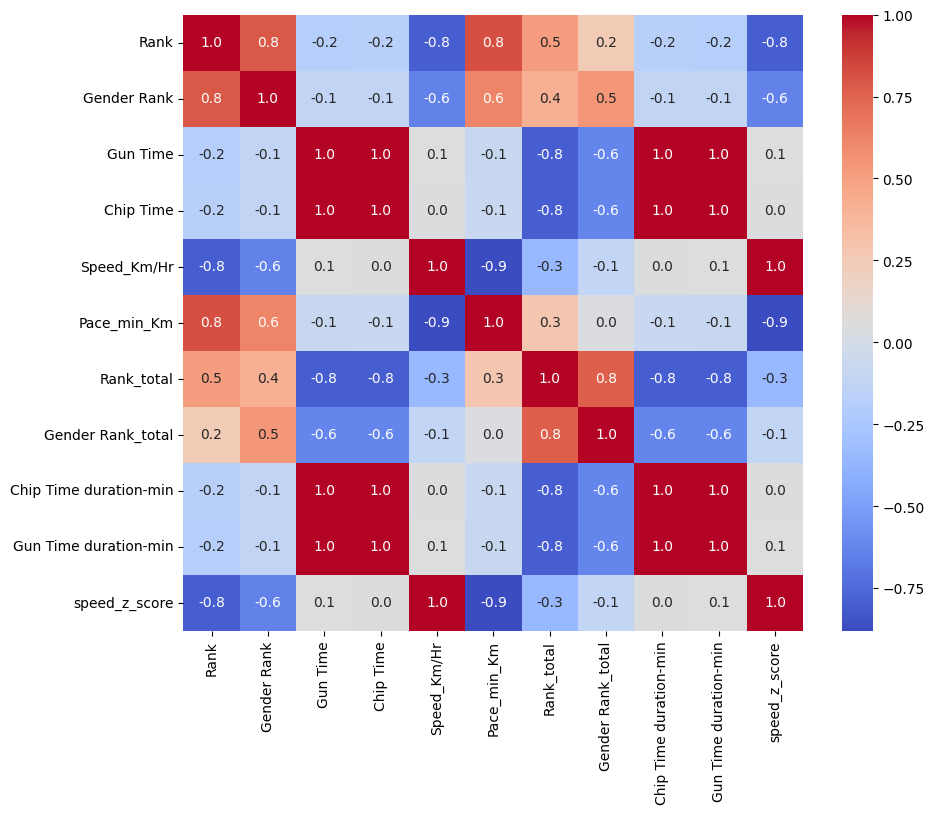

In [229]:
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,
            annot=True, 
            cmap='coolwarm',
            fmt=".1f"
           )

# Show the plot
plt.show()

In [ ]:
marathon_df.columns

In [ ]:
# Q1

In [ ]:
# counts_gender = marathon_df['Gender'].value_counts()
counts_gender

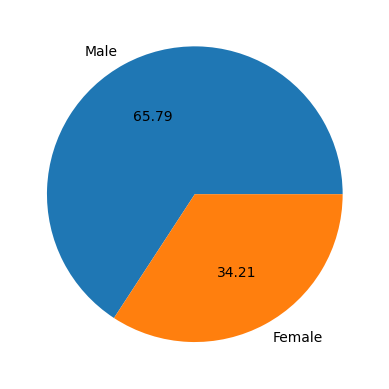

In [230]:
plt.pie(counts_gender,
        labels=counts_gender.index,
        normalize=True,
        autopct="%.2f",
        # textprops = {'color':'white'},
        # color=['red', 'blue']
       )
plt.show()

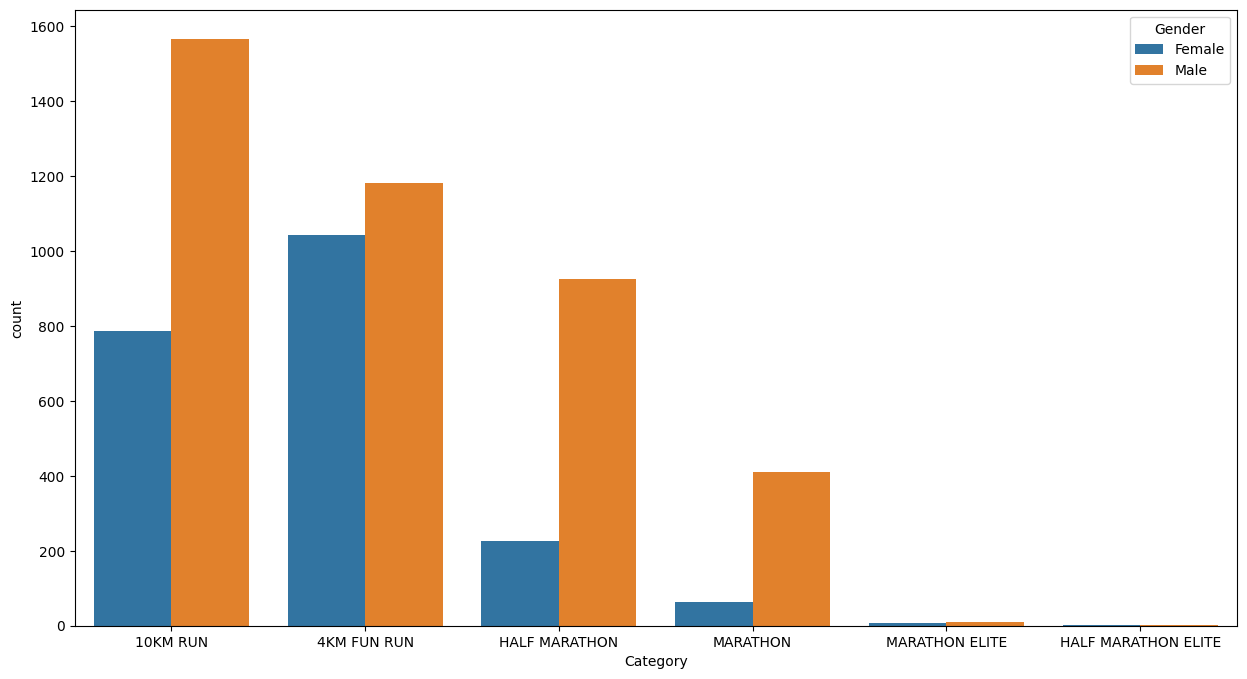

In [231]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Category', hue = 'Gender', data = marathon_df);

In [232]:
df_category_pro = marathon_df['Category'].value_counts().reset_index()
df_category_pro.columns = ['Category', 'total_count']
df_category_pro

,Category,total_count
0,10KM RUN,2352
1,4KM FUN RUN,2225
2,HALF MARATHON,1152
3,MARATHON,474
4,MARATHON ELITE,18
5,HALF MARATHON ELITE,6


In [233]:
df_gender_track_pro = marathon_df[['Category','Gender']].value_counts().reset_index()
df_gender_track_pro

,Category,Gender,count
0,10KM RUN,Male,1566
1,4KM FUN RUN,Male,1182
2,4KM FUN RUN,Female,1043
3,HALF MARATHON,Male,926
4,10KM RUN,Female,786
5,MARATHON,Male,410
6,HALF MARATHON,Female,226
7,MARATHON,Female,64
8,MARATHON ELITE,Male,10
9,MARATHON ELITE,Female,8


In [234]:
final_prop = df_gender_track_pro.merge(df_category_pro, on='Category')
final_prop['percentage'] = final_prop[['count', 'total_count']].apply(lambda x: round((x[0]/x[1])*100,2), axis=1)
final_prop

/var/folders/9n/yvd02hfx57z6hx0832zwsdrr0000gn/T/ipykernel_14918/3990637675.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_prop['percentage'] = final_prop[['count', 'total_count']].apply(lambda x: round((x[0]/x[1])*100,2), axis=1)


,Category,Gender,count,total_count,percentage
0,10KM RUN,Male,1566,2352,66.58
1,4KM FUN RUN,Male,1182,2225,53.12
2,4KM FUN RUN,Female,1043,2225,46.88
3,HALF MARATHON,Male,926,1152,80.38
4,10KM RUN,Female,786,2352,33.42
5,MARATHON,Male,410,474,86.50
6,HALF MARATHON,Female,226,1152,19.62
7,MARATHON,Female,64,474,13.50
8,MARATHON ELITE,Male,10,18,55.56
9,MARATHON ELITE,Female,8,18,44.44


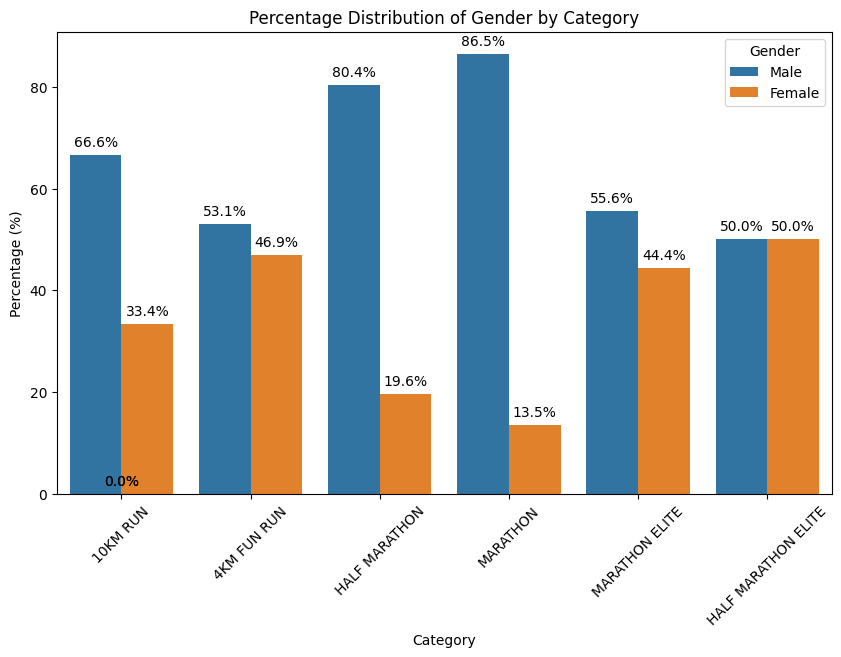

In [235]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=final_prop,
                       x='Category',
                       y='percentage',
                       hue='Gender')
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f') + '%', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Percentage Distribution of Gender by Category')
plt.ylabel('Percentage (%)')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

In [236]:
top_runner_df = marathon_df[marathon_df['Rank'].apply(lambda x: True if x in range(1, 11) else False)]
top_runner_df 

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min,speed_z_score
795,1,1,Male,10KM RUN,SA,0 days 00:31:34.524000,0 days 00:31:33.764000,19.0,3.15,10 KM,2285,1524,31.56,31.58,4.086465
796,2,2,Male,10KM RUN,SA,0 days 00:31:36.444000,0 days 00:31:35.168000,18.9,3.15,10 KM,2285,1524,31.59,31.61,4.049947
797,3,3,Male,10KM RUN,SO,0 days 00:32:52.983000,0 days 00:32:52.381000,18.2,3.28,10 KM,2285,1524,32.87,32.88,3.794325
798,4,4,Male,10KM RUN,SO,0 days 00:33:17.258000,0 days 00:33:15.920000,18.0,3.32,10 KM,2285,1524,33.27,33.29,3.721290
799,5,5,Male,10KM RUN,SA,0 days 00:33:38.484000,0 days 00:33:36.183000,17.8,3.35,10 KM,2285,1524,33.60,33.64,3.648255
800,6,6,Male,10KM RUN,SA,0 days 00:33:43.485000,0 days 00:33:43.485000,17.7,3.37,10 KM,2285,1524,33.72,33.72,3.611737
801,7,7,Male,10KM RUN,SA,0 days 00:34:25.414000,0 days 00:34:24.077000,17.4,3.43,10 KM,2285,1524,34.40,34.42,3.502185
802,8,8,Male,10KM RUN,KE,0 days 00:34:53.225000,0 days 00:34:51.268000,17.2,3.48,10 KM,2285,1524,34.85,34.89,3.429150
803,9,9,Male,10KM RUN,BH,0 days 00:34:59.759000,0 days 00:34:58.280000,17.1,3.48,10 KM,2285,1524,34.97,35.00,3.392632
804,10,10,Male,10KM RUN,BH,0 days 00:35:08.339000,0 days 00:35:05.442000,17.0,3.50,10 KM,2285,1524,35.09,35.14,3.356115


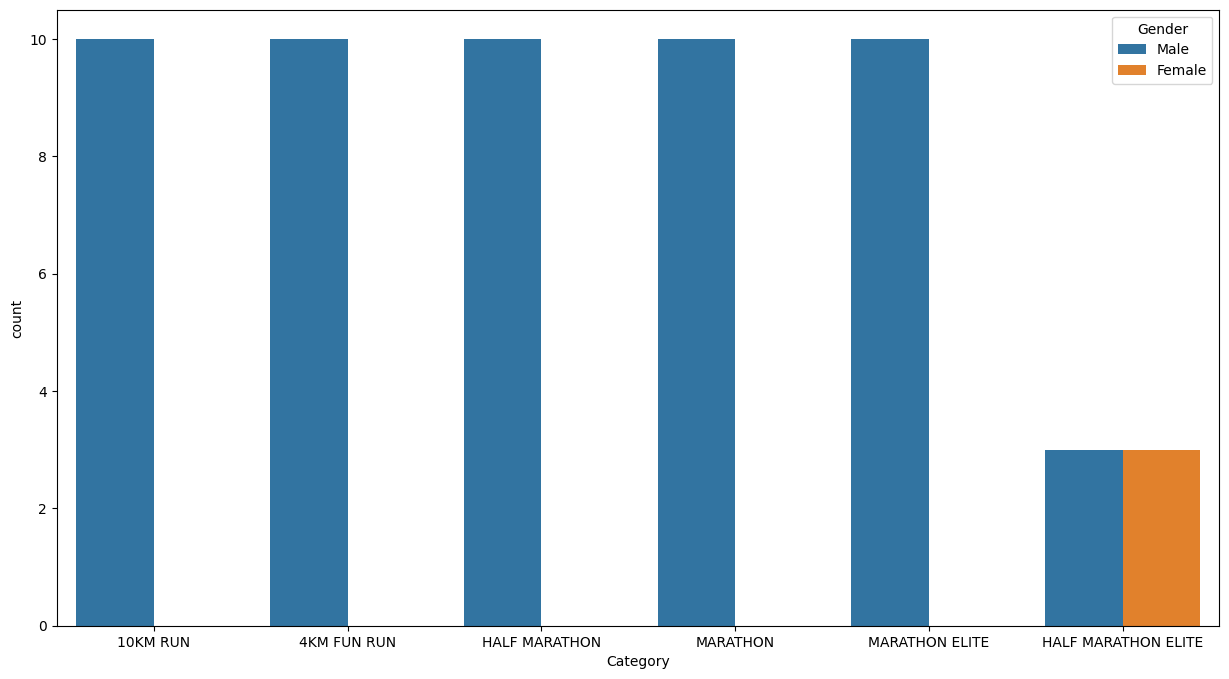

In [237]:
plt.figure(figsize=(15,8))
sns.countplot(x = 'Category', hue = 'Gender', data = top_runner_df);

In [ ]:
#Q:2

In [239]:
marathon_df.head(2)

,Rank,Gender Rank,Gender,Category,Nationality,Gun Time,Chip Time,Speed_Km/Hr,Pace_min_Km,Distance,Rank_total,Gender Rank_total,Chip Time duration-min,Gun Time duration-min,speed_z_score
0,46,1,Female,10KM RUN,SA,0 days 00:42:59.556000,0 days 00:42:57.505000,13.9,4.28,10 KM,2285,761,42.96,42.99,2.224072
1,53,2,Female,10KM RUN,CZ,0 days 00:43:28.175000,0 days 00:43:24.774000,13.8,4.33,10 KM,2285,761,43.41,43.47,2.187555


<Axes: ylabel='Chip Time'>

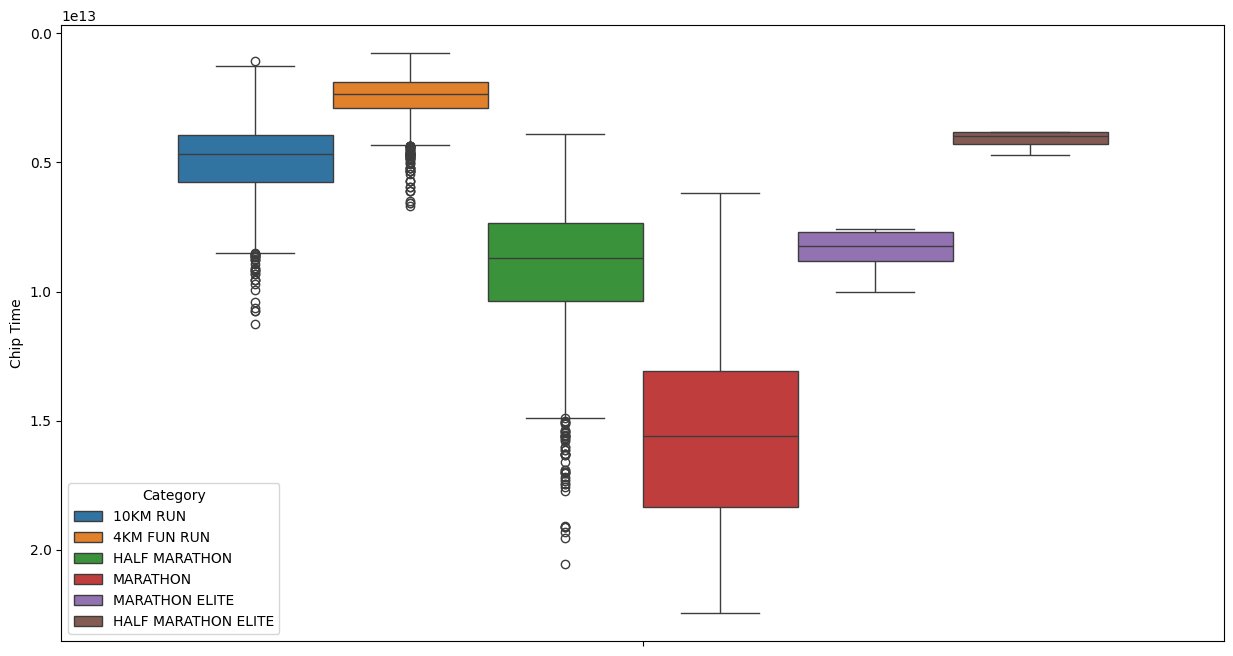

In [238]:
plt.figure(figsize=(15,8))

sns.boxplot(
    marathon_df,
    y='Chip Time',
    hue="Category")

In [240]:
fastest_time = marathon_df.groupby('Category')['Chip Time'].min()
fastest_time

Category
10KM RUN              0 days 00:18:05.247000
4KM FUN RUN           0 days 00:12:52.781000
HALF MARATHON         0 days 01:04:48.083000
HALF MARATHON ELITE   0 days 01:04:00.497000
MARATHON              0 days 01:43:10.959000
MARATHON ELITE        0 days 02:06:22.232000
Name: Chip Time, dtype: timedelta64[ns]

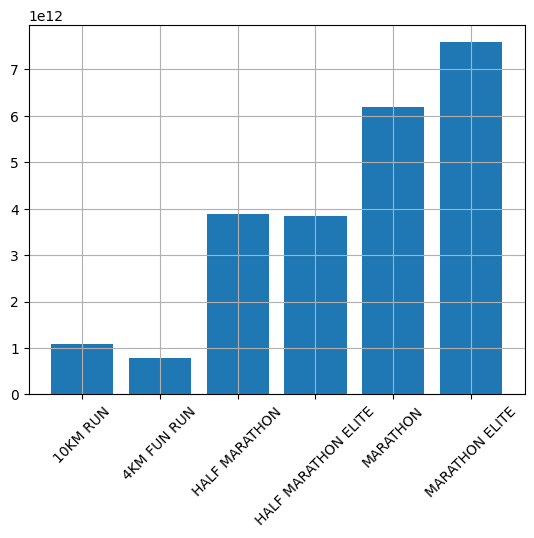

In [241]:
plt.bar(fastest_time.index,
        fastest_time.values
       )
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Q3

In [243]:
top_nat_counts

Nationality
SA          3346
PH           452
Unknown!     298
IN           239
GB           210
EG           206
PK           154
JO           122
LB           120
MY            80
Name: count, dtype: int64

In [242]:
top_nat_counts_per = (top_nat_counts / marathon_df.shape[0])*100
top_nat_counts_per

Nationality
SA          53.733740
PH           7.258712
Unknown!     4.785611
IN           3.838124
GB           3.372410
EG           3.308174
PK           2.473101
JO           1.959210
LB           1.927092
MY           1.284728
Name: count, dtype: float64

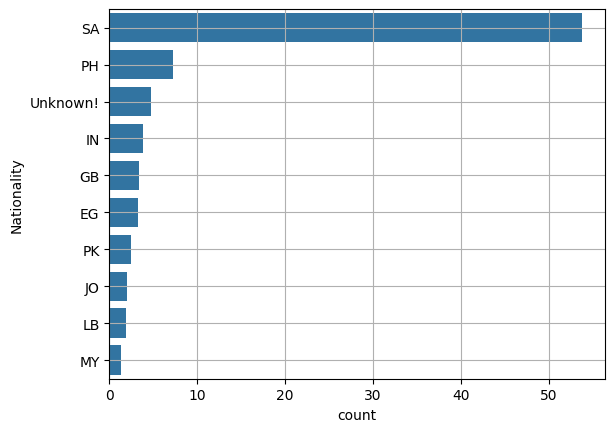

In [244]:
sns.barplot(y="Nationality", x="count",data=top_nat_counts_per.to_frame());
plt.grid()

In [245]:
(marathon_df[marathon_df["Nationality"]!= 'SA'].shape[0]/ marathon_df.shape[0])*100

46.26625983619721